In [18]:
import numpy as np
import sys
import matplotlib.pyplot as plt

In [33]:
p2 = '/Users/uni/Documents/gym-anm/gym_results/gym_anm:ANM6Easy-v0/run_2/evaluations.npz'
p3 = '/Users/uni/Documents/gym-anm/gym_results/gym_anm:ANM6Easy-v0/run_3/evaluations.npz'
p4 = '/Users/uni/Documents/gym-anm/gym_results/gym_anm:ANM6Easy-v0/run_4/evaluations.npz'
ps = [p2, p3, p4]
names = ['PPO', 'DDPG', 'SAC']

In [34]:
data = {}
for p, name in zip(ps, names):
    d = np.load(p)

    timesteps = d['timesteps']
    results = d['results'][:, 0, 0]
    discounted_results = d['discounted_results'][:, 0, 0]
    ep_lengths = d['ep_lengths'][:, 0]
    
    data[name] = (timesteps, results, discounted_results, ep_lengths)

print('Number of exp:', len(data))
print('Timesteps: ', timesteps.shape)
print('Results: ', results.shape)
print('Discounted returns: ', discounted_results.shape)
print('Episode lengths: ', ep_lengths.shape)

Number of exp: 3
Timesteps:  (1441,)
Results:  (1441,)
Discounted returns:  (1441,)
Episode lengths:  (1441,)


Best for PPO -53.015392
Best for DDPG -185.87358
Best for SAC -5.8994427


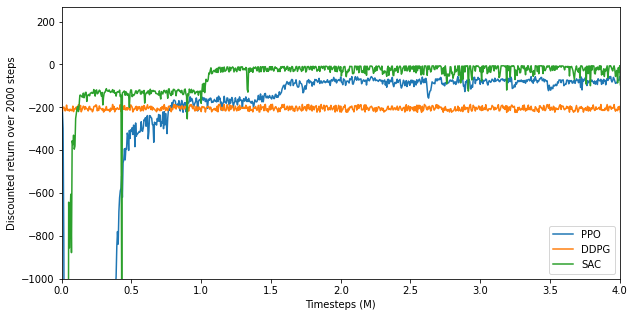

In [42]:
# Plot discounted returns.
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for name, d in data.items():
    ax.plot(d[0] / 1e6, d[2], label=name)
    print(f'Best for {name}', np.max(d[2]))
# ax.set_yscale('log')
ax.set_ylim([-1000, None])
ax.set_xlim([0, 4])
ax.set_xlabel('Timesteps (M)')
ax.set_ylabel('Discounted return over 2000 steps')
ax.legend(loc='lower right')

In [ ]:
f

Text(0, 0.5, '- Total return over 2000 steps')

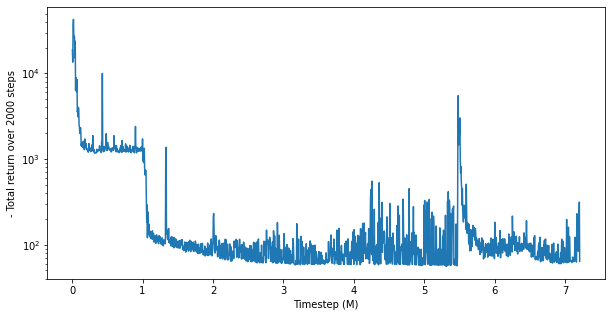

In [23]:
# Plot total returns.
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(timesteps / 1e6, -results)
ax.set_yscale('log')
ax.set_xlabel('Timestep (M)')
ax.set_ylabel('- Total return over 2000 steps')